# Campo Magnético de una carga Puntual

La ecuación de campo magnético para una carga puntual:

$${\vec B} = {\mu \over 4\pi} {{\vec v}x{\vec n_r}\over r^2} $$

Vamos a trabajar para el caso de una partícula que se mueve en dirección $y$.
$$\vec{v}=(0,v,0)$$

El campo magnético en coordenadas cartesianas (visto desde un sistema que se mueve con la partícula) es:
$${\vec B}={\mu_0\over 2\pi}{qv\over (x^{2}+y^{2}+z^{2})^{3/ 2}}(z{\vec i}-x{\vec k})$$

## Campo magnetico bidemensional

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline

q = 1.6*pow(10,-10) #[C]
mo = 4*(math.pi)*pow(10,-7) #[N*s^2/C^2], permitividad del vacio
v = 3*pow(10,5) #[m/s], velocidad de la partícula

#vectores undimensionales
x = np.arange(-1,1,0.2)
z = np.arange(-1,1,0.2)

#elimino los valores de 0 de los arrays ya que en esa zona el campo es nulo
pos_minx= np.where(min(abs(x))==(abs(x)))
pos_minz= np.where(min(abs(z))==(abs(z)))

#resscribo los arrays
x = np.delete(x,pos_minx)
z = np.delete(z,pos_minz)

#matriz de posicion. interpolacion de los vectores unidimensionales
X,Z = np.meshgrid(x,z)

#calculo las componentes del campo magnético (Bx, Bz)
Bx = pow(10,-7)*q*v*Z/pow(X**2+Z**2,3/2)
Bz = -pow(10,-7)*q*v*X/pow(X**2+Z**2,3/2)

#cambio la scala de los campos
Bx *=pow(10,10)
Bz *=pow(10,10)

#Grafico el campo vectorial
plt.quiver(X,Z,Bx,Bz)
plt.title("Lineas de Campo de una carga puntual")
plt.xlabel("x")
plt.ylabel("z")
plt.show()

Se puede observar que la intensdad del campo es mas fuerte en las cercanias de la carga 

## Campo magnetico en 3D

### Posicion de la carga en el origen del sistema

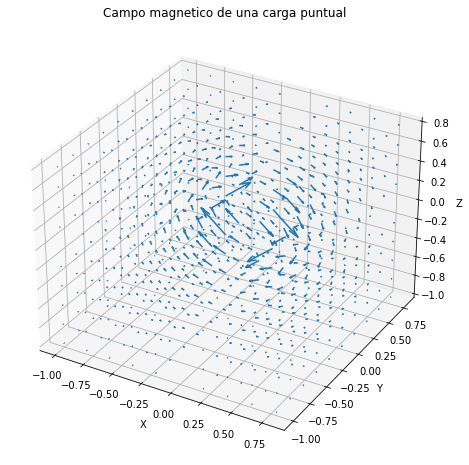

In [3]:
%matplotlib inline

q = 1.6*pow(10,-10) #[C]
mo = 4*(math.pi)*pow(10,-7) #[N*s^2/C^2], permitividad del vacio
v = 3*pow(10,5) #[m/s], velocidad de la partícula

#vectores undimensionales
x = np.arange(-1,1,0.2)
y = np.arange(-1,1,0.2)
z = np.arange(-1,1,0.2)

#elimino el valor cero o mas chico de los array, para que el campo no tienda a infinto
#Ademas el campo es Nulo en la posicion de la carga y en la direccion de su velocidad

pos_minx = np.where(min(abs(x)) == abs(x)) #convierto los valores a positiivos y busco la poscion del minimo.
#no hago lo mismo eon el array y, ya que da la posicion de los distintos planos de campo
#pos_miny = np.where(min(abs(y)) == abs(y))
pos_minz = np.where(min(abs(z)) == abs(z))

x = np.delete(x,pos_minx) #redefino los valores de los arrays
#y = np.delete(y,pos_miny)
z = np.delete(z,pos_minz)

#matriz de posicion. interpolacion de los vectores unidimensionales
X,Y,Z = np.meshgrid(x,y,z)

#calculo las componentes del campo magnético (Bx,0, Bz)
Bx = pow(10,-7)*q*v*Z/(X**2+Y**2+Z**2)**(3/2)
By = 0
Bz = -pow(10,-7)*q*v*X/(X**2+Y**2+Z**2)**(3/2)

#cambio de scala ya el orden de magnitud del campo es de 10^(-10)
Bx *=pow(10,10)
By *=pow(10,10)
Bz *=pow(10,10)

#Axes3D.quiver(x,y,z,bx,by,bz,length=0.1,normalize=True)
fig = plt.figure(num=None,figsize=(10,8))
ax = fig.gca(projection='3d')

ax.quiver(X, Y, Z, Bx, By, Bz, length= 0.5, normalize=False)
plt.title("Campo magnetico de una carga puntual")
plt.xlabel("X")
plt.ylabel("Y")
ax.set_zlabel("Z")
plt.show()

## Simulacion de carga en movimiento

Creamos un función de interaccion cuyo parámetro a controlar será la posicion de la partícula.
Es decir, vamos a cambiar la posición de la partpicula y se mostrará como cambía el campo magnético en el espacio.

Para simplificar los calculos, la carga se moverá en dirección "y" a velocidad constante

In [30]:
%matplotlib inline
from ipywidgets import interact, IntSlider

#creo la funcion de innteraccion
q = 1.6*pow(10,-10) #[C]
mo = 4*(math.pi)*pow(10,-7) #[N*s^2/C^2], permitividad del vacio
v = 3*pow(10,5) #[m/s], velocidad de la partícula

#vectores undimensionales
x = np.arange(-1,1,0.2)
y = np.arange(-1,1,0.2)
z = np.arange(-1,1,0.2)

#elimino el valor cero o mas chico de los array, para que el campo no tienda a infinto
#Ademas el campo es Nulo en la posicion de la carga y en la direccion de su velocidad

pos_minx = np.where(min(abs(x)) == abs(x)) #convierto los valores a positiivos y busco la poscion del          minimo.
#no hago lo mismo eon el array y, ya que da la posicion de los distintos planos de campo
#pos_miny = np.where(min(abs(y)) == abs(y))
pos_minz = np.where(min(abs(z)) == abs(z))

x = np.delete(x,pos_minx) #redefino los valores de los arrays
#y = np.delete(y,pos_miny)
z = np.delete(z,pos_minz)

#matriz de posicion. interpolacion de los vectores unidimensionales
X,Y,Z = np.meshgrid(x,y,z)
  

def Simulacion(pos = 1):    
    #calculo las componentes del campo magnético (Bx,0, Bz)
    Bx = pow(10,-7)*q*v*Z/(X**2+(Y-pos)**2+Z**2)**(3/2)
    By = 0
    Bz = -pow(10,-7)*q*v*X/(X**2+(Y-pos)**2+Z**2)**(3/2)

    #cambio de scala ya el orden de magnitud del campo es de 10^(-10)
    Bx *=pow(10,10)
    By *=pow(10,10)
    Bz *=pow(10,10)

    #Axes3D.quiver(x,y,z,bx,by,bz,length=0.1,normalize=True)
    fig = plt.figure(num=None,figsize=(10,8))
    ax = fig.gca(projection='3d')

    ax.quiver(X, Y, Z, Bx, By, Bz, length= 0.5, normalize=False)

    plt.title("Campo magnetico de una carga puntual")
    plt.xlabel("X")
    plt.ylabel("Y")
    ax.set_zlabel("Z")  
    plt.show()

In [31]:
#interact(Simulacion, pos = IntSlider(min = -1, max =2, step = 0.5, value = 1))
interact(Simulacion, pos = (-1,1,0.5))

interactive(children=(FloatSlider(value=1.0, description='pos', max=1.0, min=-1.0, step=0.5), Output()), _dom_…

<function __main__.Simulacion(pos=1)>

## Creacion de un gif del campo magnético

En esta parte vamos a generear una colección de imagenes del campo magnético de una particula en movimiento.

Para ello generamos una lsita vacia en la cual se guardaran todas los archivos .png. Luego mediante la libreria Imageio de python generaremos un archivo .gif. AL final se borrará todos los archivos .png de nuestra lista para liberar espacio.

In [40]:

import os
import numpy as np
import matplotlib.pyplot as plt
import imageio

#creo la funcion de innteraccion
q = 1.6*pow(10,-10) #[C]
mo = 4*(math.pi)*pow(10,-7) #[N*s^2/C^2], permitividad del vacio
v = 3*pow(10,5) #[m/s], velocidad de la partícula

#vectores undimensionales
x = np.arange(-1,1,0.2)
y = np.arange(-1,1,0.2)
z = np.arange(-1,1,0.2)

#elimino el valor cero o mas chico de los array, para que el campo no tienda a infinto
#Ademas el campo es Nulo en la posicion de la carga y en la direccion de su velocidad

pos_minx = np.where(min(abs(x)) == abs(x)) #convierto los valores a positiivos y busco la poscion del          minimo.
#no hago lo mismo eon el array y, ya que da la posicion de los distintos planos de campo
#pos_miny = np.where(min(abs(y)) == abs(y))
pos_minz = np.where(min(abs(z)) == abs(z))
x = np.delete(x,pos_minx) #redefino los valores de los arrays
#y = np.delete(y,pos_miny)
z = np.delete(z,pos_minz)

#matriz de posicion. interpolacion de los vectores unidimensionales
X,Y,Z = np.meshgrid(x,y,z)

#Creamos un parametro para cambiar la posicion de la particula en el eje y
pos_rango = np.linspace(-2,2,num=40) #Serian 5 imagenes
#Creo una lsita vacia para guardadar las imagenes
lista_png = []

for pos in pos_rango:
    #calculo las componentes del campo magnético (Bx,0, Bz)
    Bx = pow(10,-7)*q*v*Z/(X**2+(Y-pos)**2+Z**2)**(3/2)
    By = 0
    Bz = -pow(10,-7)*q*v*X/(X**2+(Y-pos)**2+Z**2)**(3/2)

    #cambio de scala ya el orden de magnitud del campo es de 10^(-10)
    Bx *=pow(10,10)
    By *=pow(10,10)
    Bz *=pow(10,10)

    #Axes3D.quiver(x,y,z,bx,by,bz,length=0.1,normalize=True)
    fig = plt.figure(num=None,figsize=(10,8))
    ax = fig.gca(projection='3d')

    ax.quiver(X, Y, Z, Bx, By, Bz, length= 0.5, normalize=False)

    plt.title("Campo magnetico de una carga puntual")
    plt.xlabel("X")
    plt.ylabel("Y")
    ax.set_zlabel("Z")  

    #Creo el nombre de la imagen y lo agrego al a la lista vacía
    nombre_png = "{}.png".format(pos)
    lista_png.append(nombre_png)

    #Guardo la imagen
    plt.savefig(nombre_png)
    plt.close() #cierro la imagen

#Constriyo el GIF
with imageio.get_writer("GIF_Campo.gif", mode="I") as writer:
    for nombre_png in lista_png:
        imagen = imageio.imread(nombre_png)
        writer.append_data(imagen)

#Borramos las imagenes
for nombre_png in lista_png:
    os.remove(nombre_png)
